In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import csv
import os
import pandas as pd
import librosa
import math
import json
import wave
import contextlib

<IPython.core.display.Javascript object>

In [3]:
SAMPLE_RATE = 22050
DURATION = 3
Total_Sample = SAMPLE_RATE * DURATION

<IPython.core.display.Javascript object>

In [4]:
def save_mfcc(
    dataset_path, json_path, n_mfcc=13, n_fft=1024, hop_length=256, num_segments=5
):

    data = {"id": [], "mfcc": [], "labels": []}
    c = 0
    count = 0
    number_of_sample_per_segment = int(Total_Sample / num_segments)

    expected_mfcc_per_segment = math.ceil(number_of_sample_per_segment / hop_length)

    for root, dir, files in os.walk(dataset_path):
        for d in dir:
            print(d)
            if d not in d_less_2:
                c += 1
                for file in os.listdir(os.path.join(root, d)):
                    if file.endswith(".wav"):
                        print(file)

                        signal, sr = librosa.load(
                            os.path.join(root, d, file), sr=SAMPLE_RATE
                        )
                        label_string = disease_dict[d]
                        label_index = label_encoder[label_string]

                        for s in range(num_segments):
                            start_sample = number_of_sample_per_segment * s
                            finish_sample = number_of_sample_per_segment + start_sample

                            mfcc = librosa.feature.mfcc(
                                signal[start_sample:finish_sample],
                                sr=sr,
                                n_fft=n_fft,
                                n_mfcc=n_mfcc,
                                hop_length=hop_length,
                            )

                            mfcc = mfcc.T

                            if len(mfcc) == expected_mfcc_per_segment:
                                data["id"].append(d)
                                data["mfcc"].append(mfcc.tolist())
                                data["labels"].append(label_index)
                print("count", c)

    with open(json_path, "w") as fw:
        json.dump(data, fw, indent=4)

<IPython.core.display.Javascript object>

In [5]:
DATASET_PATH = "COVID-19"
JSON_PATH = "covid_19_data.json"

<IPython.core.display.Javascript object>

In [6]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(DATASET_PATH):
    for file in f:
        if ".wav" in file:
            files.append(os.path.join(r, file))

<IPython.core.display.Javascript object>

In [7]:
files

['COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/vowel-o.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/vowel-a.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/breathing-shallow.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/cough-shallow.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/vowel-e.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/cough-heavy.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/breathing-deep.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/counting-normal.wav',
 'COVID-19/7DfMFXPDu3W2Fxjs8w0OsLIY8em1/counting-fast.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/vowel-o.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/vowel-a.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/breathing-shallow.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/cough-shallow.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/vowel-e.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/cough-heavy.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/breathing-deep.wav',
 'COVID-19/N1orpaThfMaEneE3dbfn3DZ604Z2/counting-normal.wav',
 'COVI

<IPython.core.display.Javascript object>

In [8]:
disease_dict = {}
d_less_2 = set()

for fname in files:
    with contextlib.closing(wave.open(fname, "r")) as f:
        d = fname.split("/")[1]

        frames = f.getnframes()
        rate = f.getframerate()
        duration = math.ceil(frames / float(rate))

        if duration == 0 or duration == 2 or duration == 1 or duration == 3:
            d_less_2.add(d)

<IPython.core.display.Javascript object>

In [9]:
len(d_less_2)

116

<IPython.core.display.Javascript object>

In [10]:
disease = pd.read_csv(
    "https://raw.githubusercontent.com/iiscleap/Coswara-Data/master/combined_data.csv"
)
ids = disease["id"].tolist()
labels = disease["covid_status"].tolist()

<IPython.core.display.Javascript object>

In [11]:
disease.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [12]:
for id, label in zip(ids, labels):
    disease_dict[id] = label

<IPython.core.display.Javascript object>

In [13]:
label_encoder = {
    "healthy": 0,
    "no_resp_illness_exposed": 1,
    "positive_asymp": 2,
    "positive_mild": 3,
    "positive_moderate": 4,
    "recovered_full": 5,
    "resp_illness_not_identified": 6,
}

<IPython.core.display.Javascript object>

In [14]:
save_mfcc(DATASET_PATH, JSON_PATH)

7DfMFXPDu3W2Fxjs8w0OsLIY8em1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 1
N1orpaThfMaEneE3dbfn3DZ604Z2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 2
E3WOlLhxnnXVcE0KOFvydjAPmKH2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 3
w7pdOIUnHPRfYLXVVRtIRsOjGnr2
dtV4ZlnWakRFGKpIfiUqdu3q6iq1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 4
8ZV97Hmq6VSrBRqWaiOLx44cHY33
6pXKrZlDycStXTNMBjGXtxxYfvc2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 5
Su4dvUzB8USc

breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 42
7arBtLdzGeW8oCN0DXhI6dqqUdP2
UxRRwXJtdjRZI4pgQcHHURVa33n2
xDgSKI3IBQNu2G3msYhxC7URtop1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 43
myAv7VQZySPhI599FSTraHN0vtH3
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 44
BZHvK60v1LY9cBfLvYkBkJxdfNz2
6wvKyVH5jNcuBCjwHE7WvgbtaqI3
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 45
WSNcPIb74jUzQoVPA7RGZKWtMrM2
cpkq5jRCUDOvtB7vROcz6LuOAzr2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 46
Ht

breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 83
9CUhQAT3U5YhxXmqkw01co7jVOU2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 84
2jFheyh8bLO5peh0HPYGYjH5N9x2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 85
dvRr97gwv7Y34YqaccErnWcYRY53
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 86
n4t5cgNQKXO3F8KP55vWOgYWcXC3
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 87
uZjB5Oxr9zS4xZn8rq5ubyAp17A2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 88

cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 124
aLeBZp6qmVVooQsTvP1ptnQk9IS2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 125
sCqJBGNT5AhdqxZD0AuJPbbhJ4k2
QQx7MsHhXfPFNPjPAydYMmTWkpo2
7J57fRRIEENoMhm7xRL7HNxh7Xy2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 126
8fdUOI5UtkZBCVFXNT1a4hl3rX33
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 127
fja76ZsTgfPWoDCUcwnRLI5XrLZ2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 128
lVHnQ9UNkAYmjNm7wL885LzpsOk2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
co

counting-fast.wav
count 165
95XA3QmnULQ1KPlcdw4RDDKnBhH2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 166
Zj552DZntDTpdVbrQhp7KNVL9sC3
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 167
HATVkqrdXhV2eIiwy5iIP7V0bjo2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 168
TXlvBOBGo0ReXW3AHhF5acgJ5Hm2
KmMFugVd4Pa4fZW9FqWFcHBVovf2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 169
nQzxtyMOM3bSn98zqwBe9C7r7MI2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 170
X2o

cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 208
DGWrVMD5yZc5jcjMzblC4kaBLmK2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 209
YLjbjcoMy1bCh25iChGjXXTc8RK2
46bIeJk9J8XrD4ND2IPRMQzjJBt2
hVZQcrz6cfaOMfL3jpRqJBUiumF2
oeOuvTlUMEfWPcNOA4EnTk5Bh4K2
gpcoorcyfuXQZxcUFTxthUKOua03
W673kSjviTeaeIVpuLAtv9up4s72
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 210
zpjoDhhHvJcfhSHTK9i895kmr2f1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 211
Lz3Pu5AOFbQLTA8cIqRAmjPy8qw1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav


vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 249
Za0aCHrh7pcZrQI3Qg5JiSOl3o42
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 250
0xsz0lbpsoVgfojvTNSAjv9dhBq1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 251
kOVQkT3hXPSecuCMdUHB35ejBAl2
f78ZFmqneaOWttg3xhtcmO4XZOu2
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 252
giXzRAAuoRRAg7xQ9Y56DX0FVDr1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 253
joORHxc0iCTwgP7Uh5SM5N7rnnf2
vowel-o.wav
vowel-a.wav
breathing-shallow.w

vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 290
6mCAHbyEebbEDkxHxOqihoJRkX83
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 291
REREbF9ZKUd33adQOFDQXSYK3SI3
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 292
A9YX4pRpOyW1PuuL9YjMs0kFQI03
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 293
WscnqzOzFwUvHbl7MKfRcioUI9t1
vowel-o.wav
vowel-a.wav
breathing-shallow.wav
cough-shallow.wav
vowel-e.wav
cough-heavy.wav
breathing-deep.wav
counting-normal.wav
counting-fast.wav
count 294
KTaxfghl8TeziY3aZmaNxNFmUqj1
Ny6G594aKENcYgURBgYJJa62ziV2
vowel-o.wav
vowel-a.wav
breathing-shallow.w

<IPython.core.display.Javascript object>

## Model Preparation

In [16]:
import json

<IPython.core.display.Javascript object>

In [19]:
import numpy as np
import os
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

<IPython.core.display.Javascript object>

In [20]:
def load_dataset(dataset_path):

    with open(dataset_path, "r") as fr:
        data = json.load(fr)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    return X, y

<IPython.core.display.Javascript object>

In [21]:
def prepare_dataset(test_size, val_size):

    # load dataset
    X, y = load_dataset("covid_19_data.json")

    # split into train_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # split into train and validation set
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train, y_train, test_size=val_size
    )

    # CNN take 4d array convert it into 4d array -> (number_Samples, 52, 13, 1)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

<IPython.core.display.Javascript object>

In [22]:
def build_model(input_shape):

    model = keras.Sequential()

    model.add(
        keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape)
    )
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    #     model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
    #     model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding= "same"))
    #     model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(128, (2, 2), activation="relu"))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(7, activation="softmax"))
    return model

<IPython.core.display.Javascript object>

In [23]:
def predict(model, X, y):

    # X is 3 dimentional array convert it into 4 dimention array
    X = X[np.newaxis, ...]

    # predict return array with probability
    prediction = model.predict(X)

    # extract the index with max value
    predicted_index = np.argmax(prediction, axis=1)
    print("The Expected index : {}, Predicted index : {}".format(y, predicted_index))

<IPython.core.display.Javascript object>

In [24]:
def plot_graph(epochs, history):
    N = epochs
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")

    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")

    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="upper right")
    plt.savefig("plots\covid_plot.png")

<IPython.core.display.Javascript object>

In [25]:
# create train, validation and test set
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(
    0.25, 0.2
)

print(len(X_train))  # 8261
print(len(X_test))  # 3443
print(len(X_validation))  # 2066

8261
3443
2066


<IPython.core.display.Javascript object>

In [26]:
X_train.shape

(8261, 52, 13, 1)

<IPython.core.display.Javascript object>

In [31]:
# build model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

<IPython.core.display.Javascript object>

In [32]:
model = build_model(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 11, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 6, 64)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 6, 64)         256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 5, 128)        32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 3, 128)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 3, 128)        512       
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

<IPython.core.display.Javascript object>

In [33]:
# compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

<IPython.core.display.Javascript object>

In [34]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_validation, y_validation),
    batch_size=32,
    epochs=6,
)

Epoch 1/6
259/259 [==============================] - 3s 11ms/step - loss: 1.2575 - accuracy: 0.7039 - val_loss: 0.9892 - val_accuracy: 0.7377
Epoch 2/6
259/259 [==============================] - 3s 11ms/step - loss: 1.1313 - accuracy: 0.7252 - val_loss: 0.9757 - val_accuracy: 0.7377
Epoch 3/6
259/259 [==============================] - 3s 11ms/step - loss: 1.0706 - accuracy: 0.7252 - val_loss: 0.9774 - val_accuracy: 0.7377
Epoch 4/6
259/259 [==============================] - 3s 11ms/step - loss: 1.0382 - accuracy: 0.7256 - val_loss: 0.9598 - val_accuracy: 0.7377
Epoch 5/6
259/259 [==============================] - 3s 11ms/step - loss: 1.0205 - accuracy: 0.7249 - val_loss: 0.9501 - val_accuracy: 0.7377
Epoch 6/6
259/259 [==============================] - 3s 11ms/step - loss: 1.0163 - accuracy: 0.7250 - val_loss: 0.9520 - val_accuracy: 0.7377


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


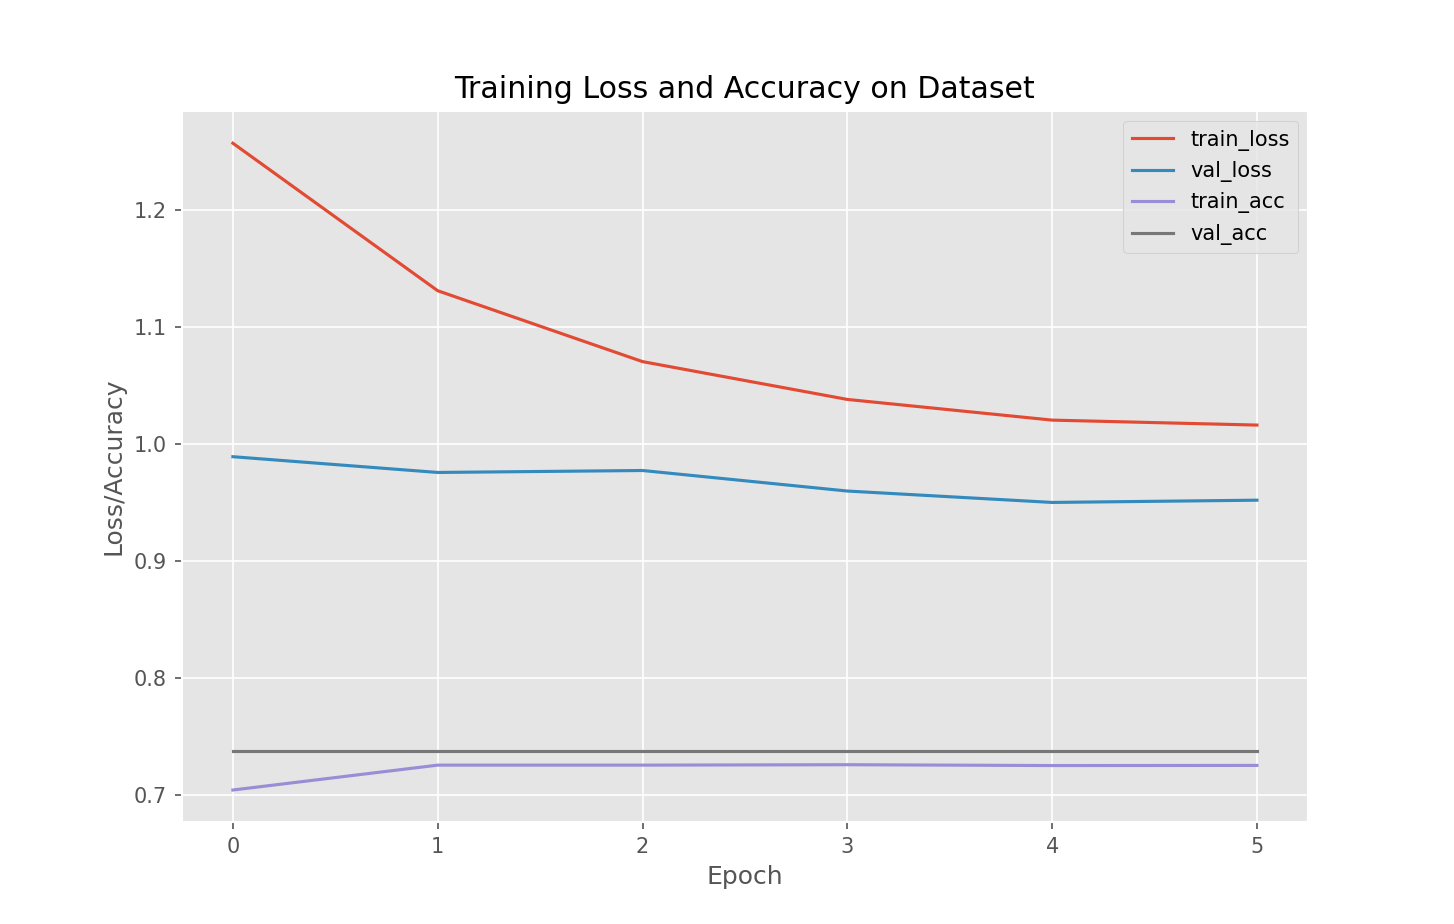

<IPython.core.display.Javascript object>

In [36]:
# # plot accuracy graph
%matplotlib notebook
plot_graph(6, history)

In [27]:
model.save("model_4_6_Extract_MFCCs_Features.h5")

<IPython.core.display.Javascript object>

In [38]:
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
print(y_test)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 3 0]


<IPython.core.display.Javascript object>

In [39]:
accuracy = accuracy_score(y_test, yhat_classes)
print("Accuracy: %f" % accuracy)

Accuracy: 0.718269


<IPython.core.display.Javascript object>

In [40]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

108/108 [==============================] - 0s 3ms/step - loss: 1.0016 - accuracy: 0.7183
Accuracy on test set is: 0.7182689309120178


<IPython.core.display.Javascript object>

In [41]:
# make prediction on single sample
X = X_test[457]
y = y_test[457]

predict(model, X, y)

The Expected index : 0, Predicted index : [0]


<IPython.core.display.Javascript object>